In [2]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
#read in  SDSS data
from astropy.table import Table
t = Table.read('../TgasWright2Mass_sdssdr12_topcat2.vot', format='votable')

In [4]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)
print("\nThe number of stars is " + str(len(t)))

The astropy reader loads the data into the following variable names:
['d_arcsec', 'col1', 'angDist', 'd_arcsec_2', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'RAdeg', 'DEdeg', 'errHalfMaj_2', 'errHalfMin_2', 'errPosAng_2', 'objID', 'mode', 'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA_2', 'e_pmRA_2', 'pmDE_2', 'e_pmDE_2', 'SpObjID', 'spType', 'spCl', 'subClass']

The number of sta

In [5]:
from astropy.table import Table
t2 = Table.read('../../ijoncour/StandCat/Tgas200_Wright2003_2MASS_FinCat.vot', format='votable')

In [6]:
print("The astropy reader loads the data into the following variable names:")
print(t2.colnames)
print("\nThe number of stars is " + str(len(t2)))

The astropy reader loads the data into the following variable names:
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']

The number of stars is 75753


In [7]:
#Rename columns
Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Bmag = t["BTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
umag = t["umag"]
gmag = t["gmag"]
rmag = t["rmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["d_arcsec_2"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
SpType = t["SpType"]
dup = t['Dup']
RA = t["X_RAJ2000"]
DEC = t["X_DEJ2000"]
col1 = t["col1"]

In [8]:
#mask all values with dup = 1
imask = 0
for i in range(0,len(dup)):
    if (dup[i] > 0.5):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(dup)):
    if(dup[i] > 0.5):
        print(i,dup[i])
print(" Masked ",imask," rows in which dup is equal to 1")

 Masked  0  rows in which dup is equal to 1


In [9]:
#get rid of duplicates
for i in range(len(col1)):
    first_match = col1[i]
    for j in range(i+1,len(col1)):
        if (first_match == col1[j]):
            col1.mask[j] = True
            Source.mask[j] = True
            Gmag.mask[j] = True
            Vmag.mask[j] = True
            Bmag.mask[j] = True
            Jmag.mask[j] = True
            Hmag.mask[j] = True
            Kmag.mask[j] = True
            umag.mask[j] = True
            gmag.mask[j] = True
            rmag.mask[j] = True
            plx.mask[j] = True
            Teff.mask[j] = True
        else: break
stars = 0
for i in range(len(col1)): 
    if (Teff.mask[i] == False):
        stars = stars+1
print("The number of stars after filtering for duplicates is: " + str(stars))

The number of stars after filtering for duplicates is: 14414


In [10]:
#Calculate absolute magnitudes for SDSS data
Dist = ma.array([])
Vmags = ma.array([])
Bmags = ma.array([])
Gmags = ma.array([])
Jmags = ma.array([])
Hmags = ma.array([])
Kmags = ma.array([])
umags = ma.array([])
gmags = ma.array([])
rmags = ma.array([])

Dist = 1000./plx
Vmags = Vmag - 5 * np.log10(Dist) + 5
Bmags = Bmag - 5 * np.log10(Dist) + 5
Gmags = Gmag - 5 * np.log10(Dist) + 5
Jmags = Jmag -5 * np.log10(Dist) + 5
Hmags = Hmag - 5 * np.log10(Dist) + 5
Kmags = Kmag - 5 * np.log10(Dist) + 5
umags = umag - 5 * np.log10(Dist) + 5
gmags = gmag - 5 * np.log10(Dist) + 5
rmags = rmag - 5 * np.log10(Dist) + 5

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning

In [11]:
#calculate distance and absolute magnitudes for Wright Data
Dist2 = 1000./t2["Plx"]
Vmags2 = t2['VTmag'] - 5 * np.log10(Dist2) + 5
Bmags2 = t2['BTmag'] - 5 * np.log10(Dist2) + 5
Gmags2 = t2['__Gmag_'] - 5 * np.log10(Dist2) + 5
Jmags2 = t2['Jmag'] -5 * np.log10(Dist2) + 5
Hmags2 = t2['Hmag'] - 5 * np.log10(Dist2) + 5
Kmags2 = t2['Kmag'] - 5 * np.log10(Dist2) + 5

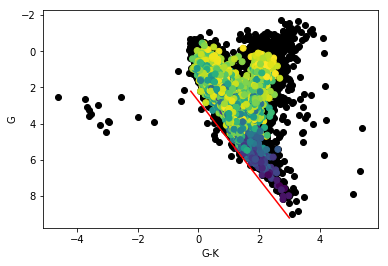

In [12]:
#Plot H-R diagram 
pdf1 = PdfPages('HR_diagrams.pdf')
G_K = Gmags-Kmags
G_K2 = Gmags2 - Kmags2
x1 = -.25
x2 = 3
xvals = np.linspace(x1,x2)
m = (9-2)/(x2-x1)
b = 2.75
yvals = np.linspace(x1*m+b,x2*m+b)
plt.figure()
plt.scatter(G_K2,Gmags2,c = 'k')
plt.scatter(G_K,Gmags,c = Dist)
plt.plot(xvals,yvals,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G-K')
plt.ylabel('G')
pdf1.savefig()
plt.show()

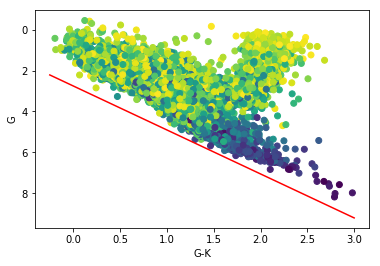

In [13]:
#Plot H-R diagram 
G_K = Gmags-Kmags
G_K2 = Gmags2 - Kmags2
x1 = -.25
x2 = 3
xvals = np.linspace(x1,x2)
m = (9-2)/(x2-x1)
b = 2.75
yvals = np.linspace(x1*m+b,x2*m+b)
plt.figure()
plt.scatter(G_K,Gmags,c = Dist)
plt.plot(xvals,yvals,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G-K')
plt.ylabel('G')
pdf1.savefig()
plt.show()

In [14]:
#find points within distance of line
d = 0.7
x_main_seq = np.ones(len(G_K))*1000
y_main_seq = np.ones(len(G_K))*1000
group = np.zeros(len(G_K))*1000
stars = 0
for i in range(len(G_K)): 
    d2 = abs(m*G_K[i]-Gmags[i]+b)/math.sqrt(math.pow(m,2)+1)
    if d2 <= d:
        x_main_seq[i] = G_K[i]
        y_main_seq[i] = Gmags[i]
        group[i] = 1
        stars = stars+1
print(stars)
        

6756


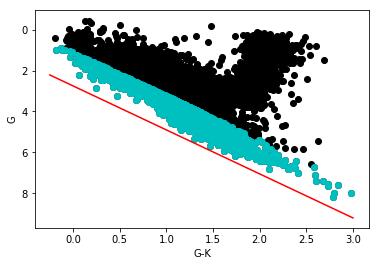

In [15]:
plt.scatter(G_K,Gmags,c = 'k')
plt.scatter(x_main_seq[x_main_seq < 1000],y_main_seq[y_main_seq < 1000],c = 'c')
plt.plot(xvals,yvals,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G-K')
plt.ylabel('G')
plt.show()

In [30]:
#split the stars into different categories based on G-K
color = np.ones(len(G_K))*1000
#colors = np.arange(0.1,3,0.1)
colors = [0.5,1,1.5,2,2.5,3]
for i in range(len(colors)):
    for j in range(len(G_K)):
        if (i == 0):
            if (G_K[j] <= colors[i]):
                color[j] = colors[i]
        elif(G_K[j] <= colors[i] and G_K[j] > colors[i-1]):
            color[j] = colors[i]
print(colors)

[0.5, 1, 1.5, 2, 2.5, 3]


In [31]:
#Split stars into different distance ranges, assign each star a distance category
distances = [100,150,200]
distance_cat = np.zeros(len(Dist))
stars = 0
for i in range(len(distances)): 
    if (i==0):
        d1 = 0
        d2 = distances[0]
    else:
        d1 = distances[i-1]
        d2 = d1+50
    for j in range(len(Dist)):
            if (Dist[j] > d1 and Dist[j] <= d2):
                distance_cat[j] = d2
                stars = stars+1
print(stars)

14414


In [32]:
#Relative Magnitude SED for stars located within 100 pc of earth
wvl = [354, 420, 477, 532, 623,  1235, 1662, 2159]
wvl2 = [354, 420, 477, 532, 623, 673, 1235, 1662, 2159]
avg_colors100 = np.array([])
err_colors100 = np.array([])
stars100 = np.array([])
for c in colors: 
    G_u_array = ma.array([])
    G_B_array = ma.array([])
    G_g_aray = ma.array([])
    G_V_array = ma.array([])
    G_r_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    u = ma.array([])
    B = ma.array([])
    g = ma.array([])
    V = ma.array([])
    r = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    stars = 0
    for i in range(len(G_K)):
        if (color[i] == c and distance_cat[i] == 100):
            G_u_array = np.append(G_V_array,Gmags[i]-umags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_g_array = np.append(G_V_array,Gmags[i]-gmags[i])
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_r_array = np.append(G_V_array,Gmags[i]-rmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            u = np.append(u,umags[i])
            B = np.append(B,Bmags[i])
            g = np.append(g,gmags[i])
            V = np.append(V,Vmags[i])
            r = np.append(r,rmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            stars = stars +1
    #average G-K value
    avg_colors100 = np.append(avg_colors100,np.mean(G_K_array))
    err_colors100 = np.append(avg_colors100,np.std(G_K_array))
    #number of stars per color
    stars100 = np.append(stars100,stars)
    #relative SED
    mag_array = [np.mean(G_u_array), np.mean(G_B_array), np.mean(G_g_array), np.mean(G_V_array), np.mean(G_r_array), \
                 np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_u_array), np.std(G_B_array), np.std(G_g_array), np.std(G_V_array), np.std(G_r_array), \
                 np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(u), np.mean(B), np.mean(g), np.mean(V), np.mean(r), np.mean(G), \
                  np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(u), np.std(B), np.std(g), np.std(V), np.std(r), np.std(G), \
                  np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (c == colors[0]):
        color_mags100 = np.array(mag_array)
        color_std100 = np.array(std_array)
        abs_color_mags100 = np.array(mag_array2)
        abs_color_std100 = np.array(std_array2)
    else:
        color_mags100 = np.vstack((color_mags100,mag_array))
        color_std100 = np.vstack((color_std100,std_array))
        abs_color_mags100 = np.vstack((abs_color_mags100, mag_array2))
        abs_color_std100 = np.vstack((abs_color_mags100, std_array2))

In [33]:
#Relative Magnitude SED for stars located between 100 and 150 pc of earth
wvl = [354, 420, 477, 532, 623,  1235, 1662, 2159]
wvl2 = [354, 420, 477, 532, 623, 673, 1235, 1662, 2159]
avg_colors150 = np.array([])
err_colors150 = np.array([])
stars150 = np.array([])
for c in colors: 
    G_u_array = ma.array([])
    G_B_array = ma.array([])
    G_g_aray = ma.array([])
    G_V_array = ma.array([])
    G_r_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    u = ma.array([])
    B = ma.array([])
    g = ma.array([])
    V = ma.array([])
    r = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    stars = 0
    for i in range(len(G_K)):
        if (color[i] == c and distance_cat[i] == 150):
            G_u_array = np.append(G_V_array,Gmags[i]-umags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_g_array = np.append(G_V_array,Gmags[i]-gmags[i])
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_r_array = np.append(G_V_array,Gmags[i]-rmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            u = np.append(u,umags[i])
            B = np.append(B,Bmags[i])
            g = np.append(g,gmags[i])
            V = np.append(V,Vmags[i])
            r = np.append(r,rmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            stars = stars +1
    #average G-K value
    avg_colors150 = np.append(avg_colors150,np.mean(G_K_array))
    err_colors150 = np.append(avg_colors150,np.std(G_K_array))
    #number of stars per color
    stars150 = np.append(stars150,stars)
    #relative SED
    mag_array = [np.mean(G_u_array), np.mean(G_B_array), np.mean(G_g_array), np.mean(G_V_array), np.mean(G_r_array), \
                 np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_u_array), np.std(G_B_array), np.std(G_g_array),np.std(G_V_array), np.std(G_r_array),\
                 np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(u), np.mean(B), np.mean(g), np.mean(V), np.mean(r),np.mean(G), \
                  np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(u), np.std(B), np.std(g), np.std(V), np.std(r),np.std(G), \
                  np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (c == colors[0]):
        color_mags150 = np.array(mag_array)
        color_std150 = np.array(std_array)
        abs_color_mags150 = np.array(mag_array2)
        abs_color_std150 = np.array(std_array2)
    else:
        color_mags150 = np.vstack((color_mags150,mag_array))
        color_std150 = np.vstack((color_std150,std_array))
        abs_color_mags150 = np.vstack((abs_color_mags150, mag_array2))
        abs_color_std150 = np.vstack((abs_color_mags150, std_array2))

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:5060: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:5138: RuntimeWarning: Degrees of freedom <= 0 for slice
  ddof=ddof, **kwargs)[()]
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59

In [34]:
#Relative Magnitude SED for stars located within 100 pc of earth
wvl = [354, 420, 477, 532, 623,  1235, 1662, 2159]
wvl2 = [354, 420, 477, 532, 623, 673, 1235, 1662, 2159]
avg_colors200 = np.array([])
err_colors200 = np.array([])
stars200 = np.array([])
for c in colors: 
    G_u_array = ma.array([])
    G_B_array = ma.array([])
    G_g_aray = ma.array([])
    G_V_array = ma.array([])
    G_r_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    u = ma.array([])
    B = ma.array([])
    g = ma.array([])
    V = ma.array([])
    r = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    stars = 0
    for i in range(len(G_K)):
        if (color[i] == c and distance_cat[i] == 200):
            G_u_array = np.append(G_V_array,Gmags[i]-umags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_g_array = np.append(G_V_array,Gmags[i]-gmags[i])
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_r_array = np.append(G_V_array,Gmags[i]-rmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            u = np.append(u,umags[i])
            B = np.append(B,Bmags[i])
            g = np.append(g,gmags[i])
            V = np.append(V,Vmags[i])
            r = np.append(r,rmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            stars = stars +1
    #average G-K value
    avg_colors200 = np.append(avg_colors200,np.mean(G_K_array))
    err_colors200 = np.append(avg_colors200,np.std(G_K_array))
    #number of stars per color
    stars200 = np.append(stars200,stars)
    #relative SED
    mag_array = [np.mean(G_u_array), np.mean(G_B_array), np.mean(G_g_array), np.mean(G_V_array), np.mean(G_r_array), \
                 np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_u_array), np.std(G_B_array), np.std(G_g_array), np.std(G_V_array), np.std(G_r_array), \
                 np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(u), np.mean(B), np.mean(g), np.mean(V), np.mean(r), np.mean(G), \
                  np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(u), np.std(B), np.std(g), np.std(V), np.std(r), np.std(G), \
                  np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (c == colors[0]):
        color_mags200 = np.array(mag_array)
        color_std200 = np.array(std_array)
        abs_color_mags200 = np.array(mag_array2)
        abs_color_std200 = np.array(std_array2)
    else:
        color_mags200 = np.vstack((color_mags200,mag_array))
        color_std200 = np.vstack((color_std200,std_array))
        abs_color_mags200 = np.vstack((abs_color_mags200, mag_array2))
        abs_color_std200 = np.vstack((abs_color_mags200, std_array2))

In [35]:
print(stars100)
print(stars150)
print(stars200)
print(avg_colors100)
print(avg_colors150)
print(avg_colors200)

[   43.   411.  2048.   654.    74.    12.]
[  230.  1072.  3269.   417.    98.     0.]
[  330.  1537.  2901.   462.   313.     5.]
[ 0.31220928  0.8500657   1.25731054  1.68431038  2.15045947  2.70775008]
[ 0.29861303  0.84071735  1.21494891  1.71249161  2.11485713         nan]
[ 0.29962421  0.83457384  1.18886487  1.78503681  2.13919489  2.57260008]


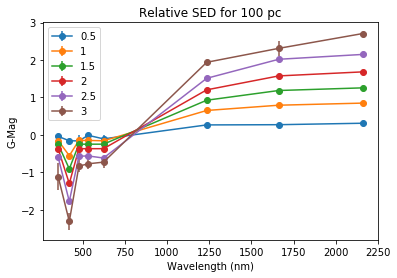

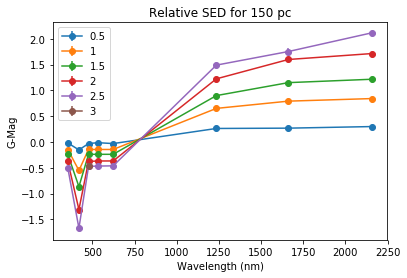

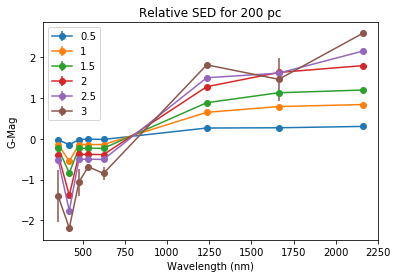

In [36]:
#Plot relative SED by distance 
plt.figure()
for i in range(len(colors)): 
    plt.errorbar(wvl,color_mags100[i,:],yerr = color_std100[i,:],linestyle = '-', marker = 'o',label = str(colors[i]))
    plt.title('Relative SED for 100 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('G-Mag')
    plt.legend()

plt.figure()
for i in range(len(colors)): 
    plt.errorbar(wvl,color_mags150[i,:],yerr = color_std150[i,:],linestyle = '-', marker = 'o',label = str(colors[i]))
    plt.title('Relative SED for 150 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('G-Mag')
    plt.legend()

plt.figure()
for i in range(len(colors)): 
    plt.errorbar(wvl,color_mags200[i,:],yerr = color_std200[i,:],linestyle = '-', marker = 'o',label = str(colors[i]))
    plt.title('Relative SED for 200 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('G-Mag')
    plt.legend()

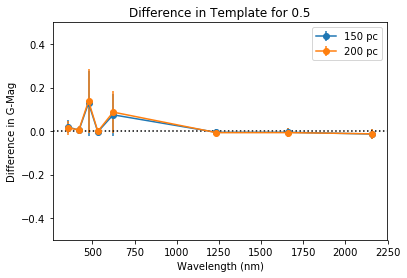

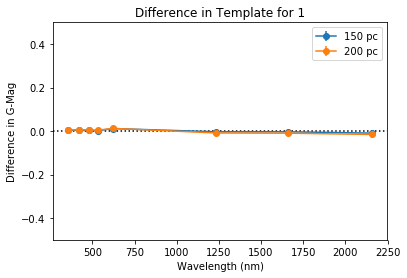

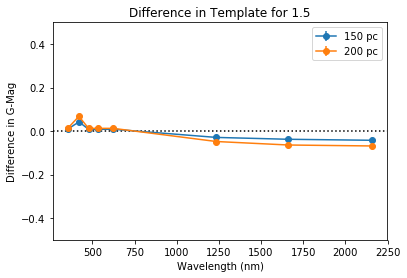

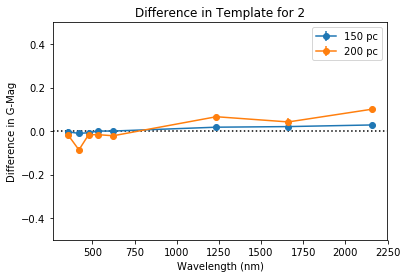

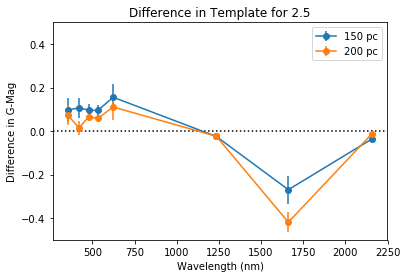

In [47]:
#Calculate average G-Mag for all G-K categories
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('Template_Differences2.pdf')
end = len(colors)
end2 = end-1
diff150 = np.zeros([len(colors),len(wvl)])
diff200 = np.zeros([len(colors),len(wvl)])
diff_std150 = np.zeros([len(colors),len(wvl)])
diff_std200 = np.zeros([len(colors),len(wvl)])
for i in range(0,end2):
    for j in range(len(wvl)):
        diff150[i,j] = color_mags150[i,j] - color_mags100[i,j]
        diff200[i,j] = color_mags200[i,j] - color_mags100[i,j]
        diff_std150[i,j] = math.sqrt(math.pow(color_std150[i,j],2) + math.pow(color_std100[i,j],2))
        diff_std200[i,j] = math.sqrt(math.pow(color_std200[i,j],2) + math.pow(color_std100[i,j],2))
    plt.figure()
    plt.errorbar(wvl, diff150[i,:], yerr = diff_std150[i,:],linestyle = '-', marker = 'o',label = '150 pc')
    plt.errorbar(wvl, diff200[i,:], yerr = diff_std200[i,:],linestyle = '-', marker = 'o',label = '200 pc')
    plt.axhline(linestyle = ':', color = 'k')
    plt.ylim(ymin=-0.5,ymax=0.5)
    plt.title('Difference in Template for '+ str(colors[i]))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Difference in G-Mag')
    plt.legend()
    pp.savefig()
pp.close()

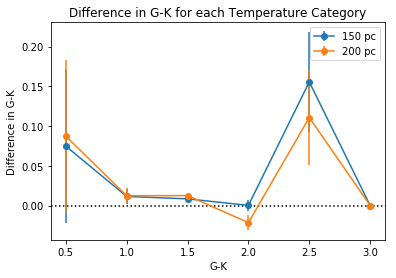

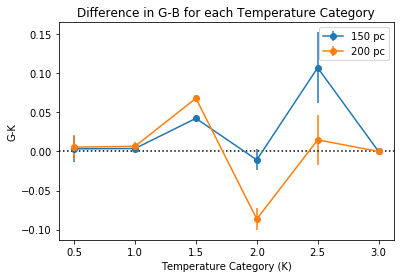

In [50]:
#Plot G-B over each G-K bin for 100 pc, 150 pc and 200 pc

pp2 = PdfPages('Temperature_Differences.pdf')
#Plot of G-K
plt.errorbar(colors, diff150[:,4],yerr = diff_std150[:,4],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(colors, diff200[:,4],yerr = diff_std200[:,4],linestyle = '-', marker = 'o',label = '200 pc')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-K for each Temperature Category' )
plt.xlabel('G-K')
plt.ylabel('Difference in G-K')
plt.legend()
pp2.savefig()
plt.show()

#Plot of G-B
plt.figure()
plt.errorbar(colors, diff150[:,1],yerr = diff_std150[:,1],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(colors, diff200[:,1],yerr = diff_std200[:,1],linestyle = '-', marker = 'o',label = '200 pc')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-B for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('G-K')
plt.legend()
pp2.savefig()
plt.show()

pp2.close()

In [ ]:
#Plot box plot of G-K and G-B over distance
G_K = 